<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/cluster_lead2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [28]:
import warnings

warnings.filterwarnings('ignore')

input

In [29]:
df = pd.read_csv("eps leadership.csv")

exploratory

In [30]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           116 non-null    float64
 1   Tenure           116 non-null    float64
 2   external parity  116 non-null    float64
 3   Internal Parity  116 non-null    float64
dtypes: float64(4)
memory usage: 125.6 KB


In [31]:
df.head()

,Gender,Tenure,external parity,Internal Parity
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


checks

In [32]:
df.isnull().sum()
df.describe()

,Gender,Tenure,external parity,Internal Parity
count,116.000000,116.000000,116.000000,116.000000
mean,0.672414,0.801724,0.353448,0.318966
std,0.471369,0.400431,0.480114,0.468098
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [33]:
X=df

Scaling

In [34]:
cols = X.columns

In [35]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [36]:
X = pd.DataFrame(X, columns=[cols])

In [37]:
X.head()

,Gender,Tenure,external parity,Internal Parity
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [38]:
X.dropna(inplace=True)
X

,Gender,Tenure,external parity,Internal Parity
0,1.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
111,1.0,1.0,0.0,0.0
112,1.0,1.0,0.0,1.0
113,1.0,1.0,1.0,0.0
114,0.0,1.0,1.0,1.0


K means

In [39]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [40]:
kmeans.cluster_centers_

array([[ 6.86567164e-01,  7.76119403e-01,  2.22044605e-16,
        -1.66533454e-16],
       [ 6.53061224e-01,  8.36734694e-01,  8.36734694e-01,
         7.55102041e-01]])

inertia

In [41]:
kmeans.inertia_

59.61072190070057

Elbow

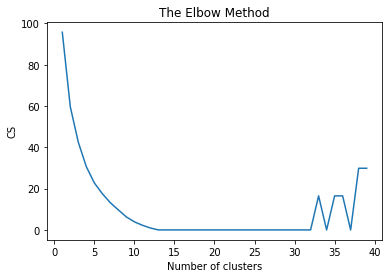

In [42]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

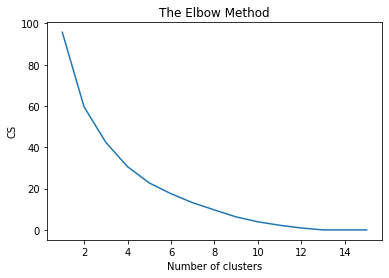

In [45]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 16), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [47]:
labels=kmeans.labels_
print(labels)

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 1 1]


In [48]:
Z=kmeans.cluster_centers_
Z

array([[ 6.86567164e-01,  7.76119403e-01,  2.22044605e-16,
        -1.66533454e-16],
       [ 6.53061224e-01,  8.36734694e-01,  8.36734694e-01,
         7.55102041e-01]])

[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.997556
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.543198
[t-SNE] KL divergence after 5000 iterations: 1.053304


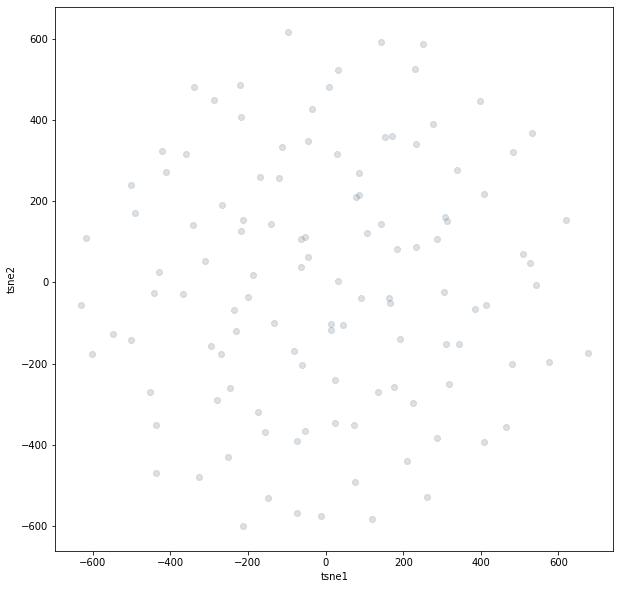

In [49]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [50]:
import matplotlib

In [51]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 115 nearest neighbors...
[t-SNE] Indexed 116 samples in 0.000s...
[t-SNE] Computed neighbors for 116 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 116 / 116
[t-SNE] Mean sigma: 0.997556
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.444485
[t-SNE] KL divergence after 2500 iterations: 0.026372


In [52]:
np.unique(labels)


array([0, 1], dtype=int32)

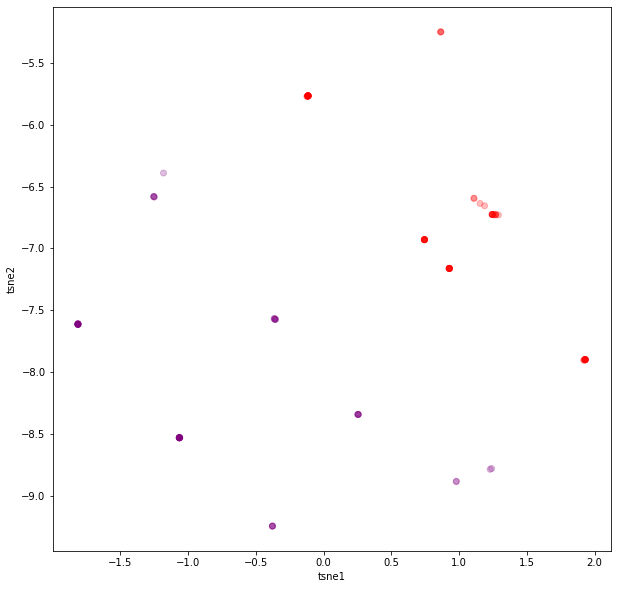

In [53]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [54]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 6.86567164e-01,  7.76119403e-01,  2.22044605e-16,
        -1.66533454e-16],
       [ 6.53061224e-01,  8.36734694e-01,  8.36734694e-01,
         7.55102041e-01]])